In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

import os
import sys
import pandas as pd

import numpy as np
import torch
import scipy
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # 기본 디렉토리 설정
# base_path = '/content/drive/MyDrive/'  # 대회 데이터셋 폴더가 들어있는 디렉토리로 설정
# data_path = os.path.join(base_path, 'data/')

In [ ]:
# 데이터 다운로드
!wget https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000399/data/20251117002531/data.tar.gz

# # 압축 해제
!tar -zxvf data.tar.gz

# 기본 디렉토리 설정
base_path = './'
data_path = os.path.join(base_path, 'data/')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
data/images_medium/0553220314.01.MZZZZZZZ.jpg
data/images_medium/._0671532413.01.MZZZZZZZ.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
data/images_medium/0671532413.01.MZZZZZZZ.jpg
data/images_medium/._8434410990.01.MZZZZZZZ.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
data/images_medium/8434410990.01.MZZZZZZZ.jpg
data/images_medium/._037321815X.01.MZZZZZZZ.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
data/images_medium/037321815X.01.MZZZZZZZ.jpg
data/images_medium/._0140388346.01.MZZZZZZZ.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
data/images_medium/0140388346.01.MZZZZZZZ.jpg
data/images_medium/._0373054432.01.MZZZZZZZ.jpg
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.

In [ ]:
#베이스라인 코드 다운로드
!wget https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000399/data/20251117013505/code.tar.gz

# # 압축 해제
!tar -zxvf code.tar.gz

# 기본 디렉토리 설정
base_path = './'
data_path = os.path.join(base_path, 'code/')

--2025-12-11 07:41:33--  https://aistages-api-public-prod.s3.amazonaws.com/app/Competitions/000399/data/20251117013505/code.tar.gz
Resolving aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)... 3.5.187.37, 3.5.187.10, 3.5.187.122, ...
Connecting to aistages-api-public-prod.s3.amazonaws.com (aistages-api-public-prod.s3.amazonaws.com)|3.5.187.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12729339 (12M) [binary/octet-stream]
Saving to: ‘code.tar.gz’

code.tar.gz         100%[===================>]  12.14M  11.1MB/s    in 1.1s    

2025-12-11 07:41:35 (11.1 MB/s) - ‘code.tar.gz’ saved [12729339/12729339]

._code
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
code/
code/._saved
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
code/saved/
code/._requirements.txt
tar: Ignori

In [ ]:
books = pd.read_csv('code/data/books.csv')
users = pd.read_csv('code/data/users.csv')
ratings = pd.read_csv('code/data/train_ratings.csv')
# test_ratings = pd.read_csv(data_path+'test_ratings.csv')

In [ ]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [ ]:
#books feature engineering
def year_map(x: int) -> int:
    x = int(x)
    return (x // 10) * 10

books['publication_decade'] = books['year_of_publication'].apply(lambda x: year_map(x))

books['category'] = books['category'].apply(lambda x: x.split('[')[1].split(']')[0][1:-1] if isinstance(x, str) and '[' in x else x)

books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,publication_decade
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,2000
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,1940-1949,"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg,1990
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,Medical,"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg,1990
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,Fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg,1990
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,History,"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg,2000


In [ ]:
books['category'].value_counts()

,count
category,
Fiction,32956
Juvenile Fiction,5804
Biography & Autobiography,3320
History,1925
Religion,1818
...,...
Cooking for the sick,1
Elementary education of adults,1
Schweden - Schule - Rechtsradikalismus - Schüler - Verschwinden - Jugendbuch,1


In [ ]:
# 유저 데이터 전처리
# 1. 나이를 수치형 변수에서 카테고리형 변수(10대, 20대, ...)로 분류하기 (나이 정보가 없는 경우에는 0으로 처리)
def age_map(x: int) -> int:
    x = int(x)
    if x < 20: return 10
    elif x >= 20 and x < 30: return 20
    elif x >= 30 and x < 40: return 30
    elif x >= 40 and x < 50: return 40
    elif x >= 50 and x < 60:return 50
    else: return 60

users['age_range'] = users['age'].apply(lambda x: age_map(x) if not pd.isna(x) else 0)

# 2. location 정보를 리스트로 변환 및 중복 제거

import regex

# users['location_list'] = users['location_list'].fillna(users['location_list'].mode())


def split_location(x: str) -> list:
    res = x.split(',')
    res = [i.strip().lower() for i in res]
    res = [regex.sub(r'[^a-zA-Z/ ]', '', i) for i in res]  # remove special characters
    res = [i if i not in ['n/a', ''] else np.nan for i in res]  # change 'n/a' into <NA>
    res.reverse()

    # remove duplicates inside list
    for i in range(len(res)-1, 0, -1):
        if res[i] in res[:i]:
            res.pop(i)

    return res

users['location_list'] = users['location'].apply(lambda x: split_location(x))


users['location_country'] = users['location_list'].apply(lambda x: x[0])
users['location_state'] = users['location_list'].apply(lambda x: x[1] if len(x) >= 2 else np.nan)
users['location_city'] = users['location_list'].apply(lambda x: x[2] if len(x) >= 3 else np.nan)

# -> 이하 부분은 최빈값으로 바로 대체


# 만일 지역 정보의 뒷부분(주 또는 도시)은 주어졌으나 지역 정보 앞부분(국가 또는 주)이 없는 경우, 최빈값으로 대체

for idx, row in users.iterrows():
    if (not pd.isna(row['location_state'])) and pd.isna(row['location_country']):
        fill_country = users[users['location_state'] == row['location_state']]['location_country'].mode()
        fill_country = fill_country[0] if len(fill_country) > 0 else np.nan
        users.loc[idx, 'location_country'] = fill_country
    elif (not pd.isna(row['location_city'])) and pd.isna(row['location_state']):
        if not pd.isna(row['location_country']):
            fill_state = users[(users['location_country'] == row['location_country'])
                                & (users['location_city'] == row['location_city'])]['location_state'].mode()
            fill_state = fill_state[0] if len(fill_state) > 0 else np.nan
            users.loc[idx, 'location_state'] = fill_state
        else:
            fill_state = users[users['location_city'] == row['location_city']]['location_state'].mode()
            fill_state = fill_state[0] if len(fill_state) > 0 else np.nan
            fill_country = users[users['location_city'] == row['location_city']]['location_country'].mode()
            fill_country = fill_country[0] if len(fill_country) > 0 else np.nan
            users.loc[idx, 'location_country'] = fill_country
            users.loc[idx, 'location_state'] = fill_state

# 3. 최종결측치 처리
users = users.fillna('unknown')


users.head(10)

,user_id,location,age,age_range,location_list,location_country,location_state,location_city
0,8,"timmins, ontario, canada",unknown,0,"[canada, ontario, timmins]",canada,ontario,timmins
1,11400,"ottawa, ontario, canada",49.0,40,"[canada, ontario, ottawa]",canada,ontario,ottawa
2,11676,"n/a, n/a, n/a",unknown,0,[nan],unknown,unknown,unknown
3,67544,"toronto, ontario, canada",30.0,30,"[canada, ontario, toronto]",canada,ontario,toronto
4,85526,"victoria, british columbia, canada",36.0,30,"[canada, british columbia, victoria]",canada,british columbia,victoria
5,96054,"ottawa, ontario, canada",29.0,20,"[canada, ontario, ottawa]",canada,ontario,ottawa
6,116866,"ottawa, ,",unknown,0,"[nan, ottawa]",unknown,ottawa,unknown
7,123629,"kingston, ontario, canada",unknown,0,"[canada, ontario, kingston]",canada,ontario,kingston
8,177458,"ottawa, ontario, canada",29.0,20,"[canada, ontario, ottawa]",canada,ontario,ottawa
9,200273,"comber, ontario, canada",unknown,0,"[canada, ontario, comber]",canada,ontario,comber


In [ ]:
# 책 데이터 전처리
# 1. change N/A values in language to 'en'
books['language'] = books['language'].fillna('en')

books = books.fillna('unknown')
#사용할 피쳐를 결정하여 평점 dataframe에 조인하기
user_features = ['user_id', 'age_range', 'location_country', 'location_state', 'location_city']
item_features = ['isbn', 'book_title', 'book_author','category', 'publisher', 'language', 'publication_decade']

df = pd.merge(ratings, users[user_features], on='user_id', how='left')
df = pd.merge(df, books[item_features], on='isbn', how='left')

In [ ]:
#  결측치 확인
df.isnull().sum()

,0
user_id,0
isbn,0
rating,0
age_range,0
location_country,0
location_state,0
location_city,0
book_title,0
book_author,0
category,0


In [ ]:
df.shape

(306795, 13)

In [ ]:
df.head()

,user_id,isbn,rating,age_range,location_country,location_state,location_city,book_title,book_author,category,publisher,language,publication_decade
0,8,0002005018,4,0,canada,ontario,timmins,Clara Callan,Richard Bruce Wright,Actresses,HarperFlamingo Canada,en,2000
1,67544,0002005018,7,30,canada,ontario,toronto,Clara Callan,Richard Bruce Wright,Actresses,HarperFlamingo Canada,en,2000
2,123629,0002005018,8,0,canada,ontario,kingston,Clara Callan,Richard Bruce Wright,Actresses,HarperFlamingo Canada,en,2000
3,200273,0002005018,8,0,canada,ontario,comber,Clara Callan,Richard Bruce Wright,Actresses,HarperFlamingo Canada,en,2000
4,210926,0002005018,9,0,canada,ontario,guelph,Clara Callan,Richard Bruce Wright,Actresses,HarperFlamingo Canada,en,2000


In [ ]:
# 평가횟수가 n 초과인 book 에 대한 rating data 만 남깁니다. (n = 30이라는 임의의 숫자로 설정)
# 효율적인 실습을 위해 rating 정보가 너무 희귀한 책에 대한 정보는 사용하지 않기로 하겠습니다.
book_counts = df['book_title'].value_counts()
df = df[df['book_title'].isin(book_counts[book_counts > 30].index)]

# 평가횟수가 n 초과인 user 에 대한 rating data 만 남깁니다. (n = 5이라는 임의의 숫자로 설정)
# 효율적인 실습을 위해 rating 정보가 너무 희귀한 user에 대한 정보는 사용하지 않기로 하겠습니다.
user_counts = df['user_id'].value_counts()
df = df[df['user_id'].isin(user_counts[user_counts > 5].index)]


# filtered_df.head()
len(df)

28317

In [ ]:
# label encoding
label_dict = dict()
df_label = df.copy()
for col in df_label.columns:
    if col == 'rating':
        continue
    df_label[col] = df_label[col].astype("category")  # 정수값이라 카테고리형 변수로 인식되지 않는 경우가 있으므로 모두 변환
    label_dict[col] = {value: idx for idx, value in enumerate(df_label[col].cat.categories)}
    df_label[col] = df_label[col].cat.codes

    # label 개수 출력
    print(f'{col} : {len(label_dict[col])}')

    # label_dict 일부 출력
    tmp = {k: v for k, v in list(label_dict[col].items())[:10]}
    print(f'\t{tmp}')

user_id : 2117
	{243: 0, 244: 1, 254: 2, 638: 3, 805: 4, 882: 5, 1131: 6, 1424: 7, 1435: 8, 1674: 9}
isbn : 2116
	{'0001047973': 0, '0002558122': 1, '000649840X': 2, '002542730X': 3, '0048231398': 4, '0060001941': 5, '006000438X': 6, '0060008032': 7, '0060008296': 8, '0060008776': 9}
age_range : 7
	{0: 0, 10: 1, 20: 2, 30: 3, 40: 4, 50: 5, 60: 6}
location_country : 44
	{'antarctica': 0, 'aruba': 1, 'australia': 2, 'austria': 3, 'belgium': 4, 'brazil': 5, 'canada': 6, 'china': 7, 'czech republic': 8, 'dominican republic': 9}
location_state : 204
	{'ae': 0, 'alabama': 1, 'alaska': 2, 'albay': 3, 'alberta': 4, 'albuquerque': 5, 'alburquerque': 6, 'alpharetta': 7, 'anaheim hills': 8, 'ap': 9}
location_city : 1194
	{'abilene': 0, 'abingdon': 1, 'acapulco': 2, 'ada': 3, 'adams': 4, 'aiken': 5, 'akron': 6, 'albany': 7, 'albuquerque': 8, 'aldergrove': 9}
book_title : 923
	{'1984': 0, '1st to Die: A Novel': 1, '2nd Chance': 2, '3rd Degree': 3, '4 Blondes': 4, '84 Charing Cross Road': 5, 'A Beau

In [ ]:
df_label

,user_id,isbn,rating,age_range,location_country,location_state,location_city,book_title,book_author,category,publisher,language,publication_decade
13,74,700,8,0,41,180,1083,726,23,82,234,1,6
14,196,700,9,2,43,174,530,726,23,82,234,1,6
15,331,700,9,3,43,175,912,726,23,82,234,1,6
18,1129,700,9,0,43,2,464,726,23,82,234,1,6
23,1746,700,7,5,43,38,213,726,23,82,234,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302004,1901,194,8,4,43,113,481,73,385,128,132,1,5
303278,1949,2102,9,3,43,11,1071,148,512,128,320,1,5
305151,2028,1318,10,3,43,187,864,630,261,128,265,1,4
306479,2095,2069,8,4,43,135,819,396,129,128,304,1,7


In [ ]:
SEED = 0
random.seed(SEED)
np.random.seed(SEED)


def reset_and_set_seed(seed=SEED):
    torch.cuda.empty_cache()
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        # torch.backends.cudnn.benchmark = False

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# train_X, test_X, train_y, test_y는 기존 코드 그대로 사용
train_X, test_X, train_y, test_y = train_test_split(
    df_label.loc[:, df_label.columns != 'rating'],
    df_label['rating'],
    test_size=0.2,
    random_state=SEED
)

print('***** FM & FFM 데이터 *****')
print('학습 데이터 크기:', train_X.shape, train_y.shape)
print('테스트 데이터 크기:', test_X.shape, test_y.shape)


***** FM & FFM 데이터 *****
학습 데이터 크기: (22653, 12) (22653,)
테스트 데이터 크기: (5664, 12) (5664,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

####################################
# 1) train + test rating 데이터 로드
####################################
test_rating_df = pd.read_csv("code/data/test_ratings.csv")

# 문자열 통일
df_label["user_id"] = df_label["user_id"].astype(str)
df_label["isbn"] = df_label["isbn"].astype(str)
test_rating_df["user_id"] = test_rating_df["user_id"].astype(str)
test_rating_df["isbn"] = test_rating_df["isbn"].astype(str)

feature_cols = ["user_id", "isbn"]

####################################
# 2) LabelEncoder를 train+test 전체로 fit
####################################
encoders = {}

for col in feature_cols:
    le = LabelEncoder()

    # train + test rating 컬럼 전체로 fit
    full_col = pd.concat([df_label[col], test_rating_df[col]]).astype(str)

    le.fit(full_col)

    # transform
    df_label[col] = le.transform(df_label[col])
    test_rating_df[col] = le.transform(test_rating_df[col])

    encoders[col] = le

####################################
# 3) 이제 split을 수행
####################################
train_X, valid_X, train_y, valid_y = train_test_split(
    df_label[feature_cols], df_label["rating"],
    test_size=0.2, random_state=SEED
)

####################################
# 4) test_rating_df 변환 완료 → 예측 가능
####################################
test_rating_features = test_rating_df[feature_cols]


LabelEncoder()

LabelEncoder()

In [ ]:
df_label.head()

,user_id,isbn,rating,age_range,location_country,location_state,location_city,book_title,book_author,category,publisher,language,publication_decade
13,25106,52401,8,0,41,180,1083,726,23,82,234,1,6
14,10940,52401,9,2,43,174,530,726,23,82,234,1,6
15,20380,52401,9,3,43,175,912,726,23,82,234,1,6
18,1482,52401,9,0,43,2,464,726,23,82,234,1,6
23,8521,52401,7,5,43,38,213,726,23,82,234,1,6


In [ ]:
test_rating_features.head()

,user_id,isbn
0,1957,10
1,1971,10
2,6094,1742
3,6617,11655
4,24428,15721


In [ ]:
####################################
# 5) XGBoost 학습
####################################
from xgboost import XGBRegressor
import numpy as np

model = XGBRegressor(
    n_estimators=800,
    max_depth=10,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",  # GPU 사용 시 "gpu_hist"
    objective="reg:squarederror"
)

model.fit(
    train_X,
    train_y,
    eval_set=[(train_X, train_y), (valid_X, valid_y)],
    verbose=True
)

####################################
# 6) 검증셋 평가
####################################
from sklearn.metrics import mean_squared_error

valid_pred = model.predict(valid_X)
rmse = np.sqrt(mean_squared_error(valid_y, valid_pred))

print(f"Validation RMSE: {rmse:.4f}")

[0]	validation_0-rmse:2.25278	validation_1-rmse:2.25883
[1]	validation_0-rmse:2.25215	validation_1-rmse:2.25840
[2]	validation_0-rmse:2.25103	validation_1-rmse:2.25764
[3]	validation_0-rmse:2.25031	validation_1-rmse:2.25705
[4]	validation_0-rmse:2.24948	validation_1-rmse:2.25652
[5]	validation_0-rmse:2.24868	validation_1-rmse:2.25600
[6]	validation_0-rmse:2.24809	validation_1-rmse:2.25559
[7]	validation_0-rmse:2.24730	validation_1-rmse:2.25510
[8]	validation_0-rmse:2.24681	validation_1-rmse:2.25478
[9]	validation_0-rmse:2.24603	validation_1-rmse:2.25419
[10]	validation_0-rmse:2.24525	validation_1-rmse:2.25374
[11]	validation_0-rmse:2.24458	validation_1-rmse:2.25333
[12]	validation_0-rmse:2.24396	validation_1-rmse:2.25287
[13]	validation_0-rmse:2.24346	validation_1-rmse:2.25249
[14]	validation_0-rmse:2.24293	validation_1-rmse:2.25215
[15]	validation_0-rmse:2.24247	validation_1-rmse:2.25180
[16]	validation_0-rmse:2.24193	validation_1-rmse:2.25146
[17]	validation_0-rmse:2.24129	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

Validation RMSE: 2.1963


In [ ]:
from torch.utils.data import Dataset, DataLoader

class RatingDataset(Dataset):
    def __init__(self, X, y=None):
        self.user = torch.tensor(X["user_id"].values, dtype=torch.long)
        self.item = torch.tensor(X["isbn"].values, dtype=torch.long)
        self.y = None if y is None else torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.user)

    def __getitem__(self, idx):
        if self.y is None:
            return self.user[idx], self.item[idx]
        return self.user[idx], self.item[idx], self.y[idx]


In [ ]:
####################################
# 0) sample_submission 로드 (순서 기준)
####################################
sample_sub = pd.read_csv("code/data/sample_submission.csv")

# 문자열 통일
sample_sub["user_id"] = sample_sub["user_id"].astype(str)
sample_sub["isbn"] = sample_sub["isbn"].astype(str)

####################################
# 1) test_rating_df 로드
####################################
test_rating_df = pd.read_csv("code/data/test_ratings.csv")

# 문자열 통일
test_rating_df["user_id"] = test_rating_df["user_id"].astype(str)
test_rating_df["isbn"] = test_rating_df["isbn"].astype(str)

####################################
# 2) sample_submission 기준 left join 으로 순서 정렬
####################################
test_merged = sample_sub.merge(
    test_rating_df,
    on=["user_id", "isbn"],
    how="left"
)


####################################
# 4) 예측
####################################
test_pred = model.predict(test_rating_features)

# 평점 범위 클리핑
test_pred = np.clip(test_pred, 1, 10)

####################################
# 5) sample_submission의 순서를 유지한 제출 파일 생성
####################################
submission = sample_sub.copy()
submission["rating"] = test_pred

####################################
# 6) 저장
####################################
submission.to_csv("xgb_submission_2.csv", index=False)
print("Saved: xgb_submission_2.csv")


Saved: xgb_submission_2.csv


<Figure size 800x500 with 0 Axes>

(array([2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 6.000e+00, 1.470e+02, 0.000e+00,
        7.000e+00, 1.250e+02, 4.000e+00, 5.000e+00, 6.000e+00, 3.000e+00,
        7.000e+00, 1.900e+01, 2.390e+02, 1.000e+01, 1.400e+01, 4.500e+01,
        6.000e+00, 2.200e+01, 3.200e+01, 2.000e+01, 2.060e+02, 1.000e+02,
        4.500e+01, 3.800e+01, 1.633e+03, 4.200e+01, 2.710e+02, 2.300e+02,
        2.610e+02, 2.010e+02, 2.000e+02, 1.122e+03, 5.590e+02, 8.800e+01,
        3.570e+02, 3.360e+02, 1.240e+03, 2.250e+02, 1.981e+03, 1.476e+03,
        1.727e+03, 1.059e+03, 2.551e+03, 3.713e+03, 1.885e+03, 6.970e+03,
        2.575e+03, 2.164e+03, 5.246e+03, 3.350e+03, 3.632e+03, 3.736e+03,
        4.201e+03, 1.403e+03, 3.834e+03, 2.171e+03, 3.812e+03, 1.426e+03,
        2.022e+03, 8.320e+02, 2.103e+03, 4.120e+02, 3.820e+02, 2.830e+02,
        1.935e+03, 2.190e+02, 2.930e+02, 3.670e+02, 2.710e+02, 2.290e+02,
        1.430e+02, 7.000e+01, 5.300e+0

Text(0.5, 1.0, 'Prediction Distribution')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

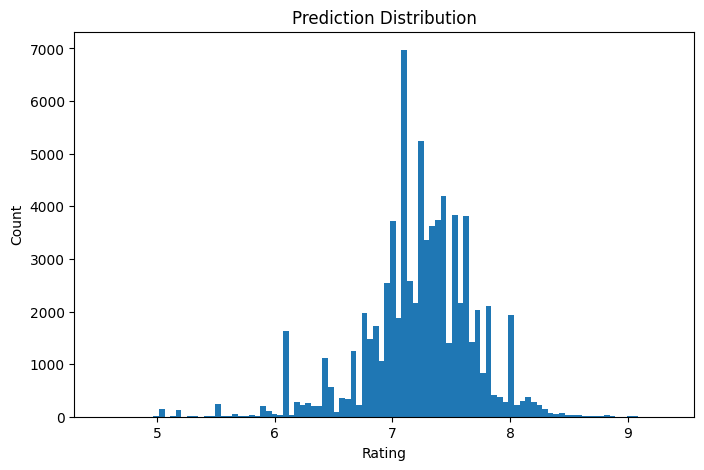

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일명 입력
df = pd.read_csv("xgb_submission_2.csv")

plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=100)
plt.title("Prediction Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

####################################
# 1) train + test rating 데이터 로드
####################################
test_rating_df = pd.read_csv("code/data/test_ratings.csv")

# 문자열 통일
df_label["user_id"] = df_label["user_id"].astype(str)
df_label["isbn"] = df_label["isbn"].astype(str)
test_rating_df["user_id"] = test_rating_df["user_id"].astype(str)
test_rating_df["isbn"] = test_rating_df["isbn"].astype(str)

feature_cols = ["user_id", "isbn"]

####################################
# 2) LabelEncoder (train+test 합쳐서 fit)
####################################
encoders = {}

for col in feature_cols:
    le = LabelEncoder()
    full_col = pd.concat([df_label[col], test_rating_df[col]]).astype(str)  # 전체로 fit
    le.fit(full_col)

    df_label[col] = le.transform(df_label[col])
    test_rating_df[col] = le.transform(test_rating_df[col])

    encoders[col] = le

####################################
# 3) train/valid split
####################################
train_X, valid_X, train_y, valid_y = train_test_split(
    df_label[feature_cols],
    df_label["rating"],
    test_size=0.2,
    random_state=SEED
)

LabelEncoder()

LabelEncoder()

In [ ]:
# 1) 문자열 통일
df_label["user_id"] = df_label["user_id"].astype(str)
df_label["isbn"] = df_label["isbn"].astype(str)
test_rating_df["user_id"] = test_rating_df["user_id"].astype(str)
test_rating_df["isbn"] = test_rating_df["isbn"].astype(str)

feature_cols = ["user_id", "isbn"]

####################################
# 2) LabelEncoder: train + test 전체로 fit
####################################
encoders = {}

for col in feature_cols:
    le = LabelEncoder()
    combined = pd.concat([df_label[col], test_rating_df[col]], axis=0).astype(str)

    le.fit(combined)

    df_label[col] = le.transform(df_label[col])
    test_rating_df[col] = le.transform(test_rating_df[col])

    encoders[col] = le

# 타입 확인 (필수)
print(df_label.dtypes)
print(test_rating_df.dtypes)


LabelEncoder()

LabelEncoder()

user_id               int64
isbn                  int64
rating                int64
age_range              int8
location_country       int8
location_state        int16
location_city         int16
book_title            int16
book_author           int16
category              int16
publisher             int16
language               int8
publication_decade     int8
dtype: object
user_id    int64
isbn       int64
rating     int64
dtype: object


In [ ]:
from lightgbm import LGBMRegressor, log_evaluation
import numpy as np
from sklearn.metrics import mean_squared_error

model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.005,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="regression"
)

model.fit(
    train_X,
    train_y,
    eval_set=[(train_X, train_y), (valid_X, valid_y)],
    eval_metric="rmse",
    callbacks=[log_evaluation(50)]
)

valid_pred = model.predict(valid_X)
rmse = np.sqrt(mean_squared_error(valid_y, valid_pred))
print(f"RMSE: {rmse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 22653, number of used features: 2
[LightGBM] [Info] Start training from score 7.473050
[50]	training's rmse: 2.23351	training's l2: 4.98855	valid_1's rmse: 2.2466	valid_1's l2: 5.04719
[100]	training's rmse: 2.21873	training's l2: 4.92277	valid_1's rmse: 2.23892	valid_1's l2: 5.01278
[150]	training's rmse: 2.206	training's l2: 4.86643	valid_1's rmse: 2.23226	valid_1's l2: 4.98298
[200]	training's rmse: 2.19486	training's l2: 4.81743	valid_1's rmse: 2.22743	valid_1's l2: 4.96144
[250]	training's rmse: 2.18545	training's l2: 4.7762	valid_1's rmse: 2.22368	valid_1's l2: 4.94475
[300]	training's rmse: 2.17716	training's l2: 4.74003	valid_1's rmse: 2.22082	valid_1's l2: 4.93206
[350]	training's rmse: 2.17034	training's l2: 4.71038	valid_1's r

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.005, n_estimators=2000,
              num_leaves=64, objective='regression', reg_lambda=1.0,
              subsample=0.8)

RMSE: 2.2051


In [ ]:
import pandas as pd
import numpy as np

####################################
# 0) sample_submission 로드 (순서 기준)
####################################
sample_sub = pd.read_csv("code/data/sample_submission.csv")

# 문자열 통일
sample_sub["user_id"] = sample_sub["user_id"].astype(str)
sample_sub["isbn"] = sample_sub["isbn"].astype(str)

####################################
# 1) test_ratings 로드
####################################
test_rating_df = pd.read_csv("code/data/test_ratings.csv")
test_rating_df["user_id"] = test_rating_df["user_id"].astype(str)
test_rating_df["isbn"] = test_rating_df["isbn"].astype(str)

####################################
# 2) 인코더를 sample_sub에도 적용 (중요!!)
####################################
sample_sub_encoded = sample_sub.copy()
sample_sub_encoded["user_id"] = encoders["user_id"].transform(sample_sub_encoded["user_id"])
sample_sub_encoded["isbn"] = encoders["isbn"].transform(sample_sub_encoded["isbn"])

test_rating_df_encoded = test_rating_df.copy()
test_rating_df_encoded["user_id"] = encoders["user_id"].transform(test_rating_df_encoded["user_id"])
test_rating_df_encoded["isbn"] = encoders["isbn"].transform(test_rating_df_encoded["isbn"])

####################################
# 3) sample_submission 기준으로 정렬
####################################
test_ordered = sample_sub_encoded.merge(
    test_rating_df_encoded,
    on=["user_id", "isbn"],
    how="left"
)

####################################
# 4) lightGBM 입력 특성
####################################
feature_cols = ["user_id", "isbn"]
test_features = test_ordered[feature_cols]

####################################
# 5) 모델 예측
####################################
test_pred = model.predict(test_features)
test_pred = np.clip(test_pred, 1, 10)

####################################
# 6) 최종 제출 파일 생성 (원본 sample_sub 순서 유지)
####################################
submission = sample_sub.copy()    # 문자열 버전
submission["rating"] = test_pred  # 예측된 평점만 붙임

####################################
# 7) 저장
####################################
submission.to_csv("lightgbm_submission.csv", index=False)
print("Saved: lightgbm_submission.csv")


Saved: lightgbm_submission.csv


<Figure size 800x500 with 0 Axes>

(array([1334.,    0.,   24.,  416.,  989., 2210., 2173., 1347., 2581.,
        2019., 3891., 9463., 2483., 4812., 3153., 7922., 4889., 9475.,
        2194., 3599., 4678., 1606., 2106.,  828., 1362.,  156.,    0.,
         254.,    0.,  735.]),
 array([5.39660965, 5.5061238 , 5.61563795, 5.72515211, 5.83466626,
        5.94418042, 6.05369457, 6.16320872, 6.27272288, 6.38223703,
        6.49175118, 6.60126534, 6.71077949, 6.82029364, 6.9298078 ,
        7.03932195, 7.1488361 , 7.25835026, 7.36786441, 7.47737856,
        7.58689272, 7.69640687, 7.80592102, 7.91543518, 8.02494933,
        8.13446348, 8.24397764, 8.35349179, 8.46300594, 8.5725201 ,
        8.68203425]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Prediction Distribution')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

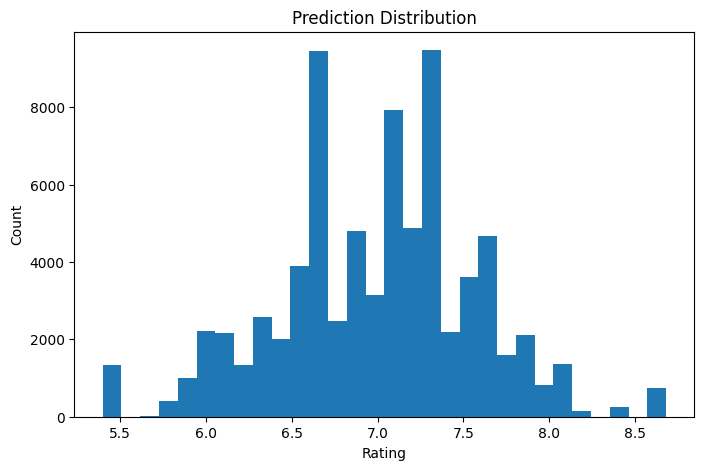

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일명 입력
df = pd.read_csv("lightgbm_submission.csv")

plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=30)
plt.title("Prediction Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
import pandas as pd

##############################################
# 1) test_ratings.csv 로드
##############################################
test_df = pd.read_csv("code/data/test_ratings.csv")

# key를 문자열로 통일
test_df["user_id"] = test_df["user_id"].astype(str)
test_df["isbn"] = test_df["isbn"].astype(str)

##############################################
# 2) 두 submission 로드
##############################################
lgb_df = pd.read_csv("lightgbm_submission.csv")
xgb_df = pd.read_csv("xgb_submission.csv")

lgb_df["user_id"] = lgb_df["user_id"].astype(str)
lgb_df["isbn"] = lgb_df["isbn"].astype(str)

xgb_df["user_id"] = xgb_df["user_id"].astype(str)
xgb_df["isbn"] = xgb_df["isbn"].astype(str)

##############################################
# 3) submission들을 test_df 순서로 정렬
##############################################

# LightGBM 정렬
lgb_sorted = test_df[["user_id", "isbn"]].merge(
    lgb_df, on=["user_id", "isbn"], how="left"
)

# XGBoost 정렬
xgb_sorted = test_df[["user_id", "isbn"]].merge(
    xgb_df, on=["user_id", "isbn"], how="left"
)

##############################################
# 4) 앙상블 (평균)
##############################################
ensemble_pred = (lgb_sorted["rating"] + xgb_sorted["rating"]) / 2

final_df = test_df[["user_id", "isbn"]].copy()
final_df["rating"] = ensemble_pred
final_df["rating"] = final_df["rating"].clip(1, 10)  # 범위 제한

##############################################
# 5) 저장
##############################################
final_df.to_csv("ensemble_submission.csv", index=False)
print("Saved → ensemble_submission.csv")


Saved → ensemble_submission.csv


<Figure size 800x500 with 0 Axes>

(array([3.000e+00, 0.000e+00, 9.000e+00, 2.100e+01, 2.800e+01, 5.670e+02,
        7.660e+02, 8.260e+02, 4.900e+02, 7.090e+02, 1.541e+03, 2.722e+03,
        3.338e+03, 2.484e+03, 6.043e+03, 6.031e+03, 7.772e+03, 8.928e+03,
        8.598e+03, 7.573e+03, 6.368e+03, 5.308e+03, 3.082e+03, 1.350e+03,
        1.394e+03, 6.420e+02, 6.300e+01, 2.900e+01, 7.000e+00, 7.000e+00]),
 array([5.20731839, 5.31782668, 5.42833497, 5.53884326, 5.64935155,
        5.75985984, 5.87036813, 5.98087642, 6.09138471, 6.201893  ,
        6.31240129, 6.42290958, 6.53341787, 6.64392616, 6.75443445,
        6.86494275, 6.97545104, 7.08595933, 7.19646762, 7.30697591,
        7.4174842 , 7.52799249, 7.63850078, 7.74900907, 7.85951736,
        7.97002565, 8.08053394, 8.19104223, 8.30155052, 8.41205881,
        8.5225671 ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Prediction Distribution')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

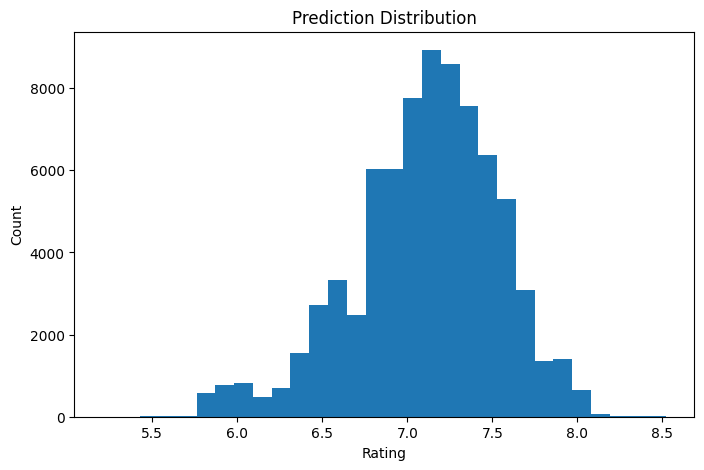

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일명 입력
df = pd.read_csv("ensemble_submission.csv")

plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=30)
plt.title("Prediction Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()